In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
data = pd.read_csv(r"data\Concrete Compressive Strength.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cement                    1030 non-null   float64
 1   slag                      1030 non-null   float64
 2   ash                       1030 non-null   float64
 3   water                     1030 non-null   float64
 4   superplastic              1030 non-null   float64
 5   coarseagg                 1030 non-null   float64
 6   fineagg                   1030 non-null   float64
 7   age                       1030 non-null   int64  
 8   strength                  1030 non-null   float64
 9   water_cement_ratio        1030 non-null   float64
 10  total_binder              1030 non-null   float64
 11  aggregate_to_cement       1030 non-null   float64
 12  cement_water_interaction  1030 non-null   float64
 13  age_strength_proxy        1030 non-null   float64
dtypes: float

In [14]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748263,409.252039,7.199021,50868.988301,5.774836
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314003,92.780669,2.882574,19585.735383,3.510750
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266892,200.000000,3.097753,19584.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533332,336.425000,4.875033,33438.440000,2.645751
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675346,391.300000,6.535102,48816.240000,5.291503
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935160,483.700000,9.240795,63552.000000,7.483315
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882334,640.000000,17.931197,108300.000000,19.104973


In [15]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,total_binder,aggregate_to_cement,cement_water_interaction,age_strength_proxy
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440188,353.3,12.174719,28754.55,5.291503
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937235,335.4,11.113019,26736.87,3.741657
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749597,345.7,7.272371,46850.00,5.291503
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857140,380.0,6.022534,60648.00,5.291503
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248700,338.2,11.266723,29922.84,5.291503


<Axes: >

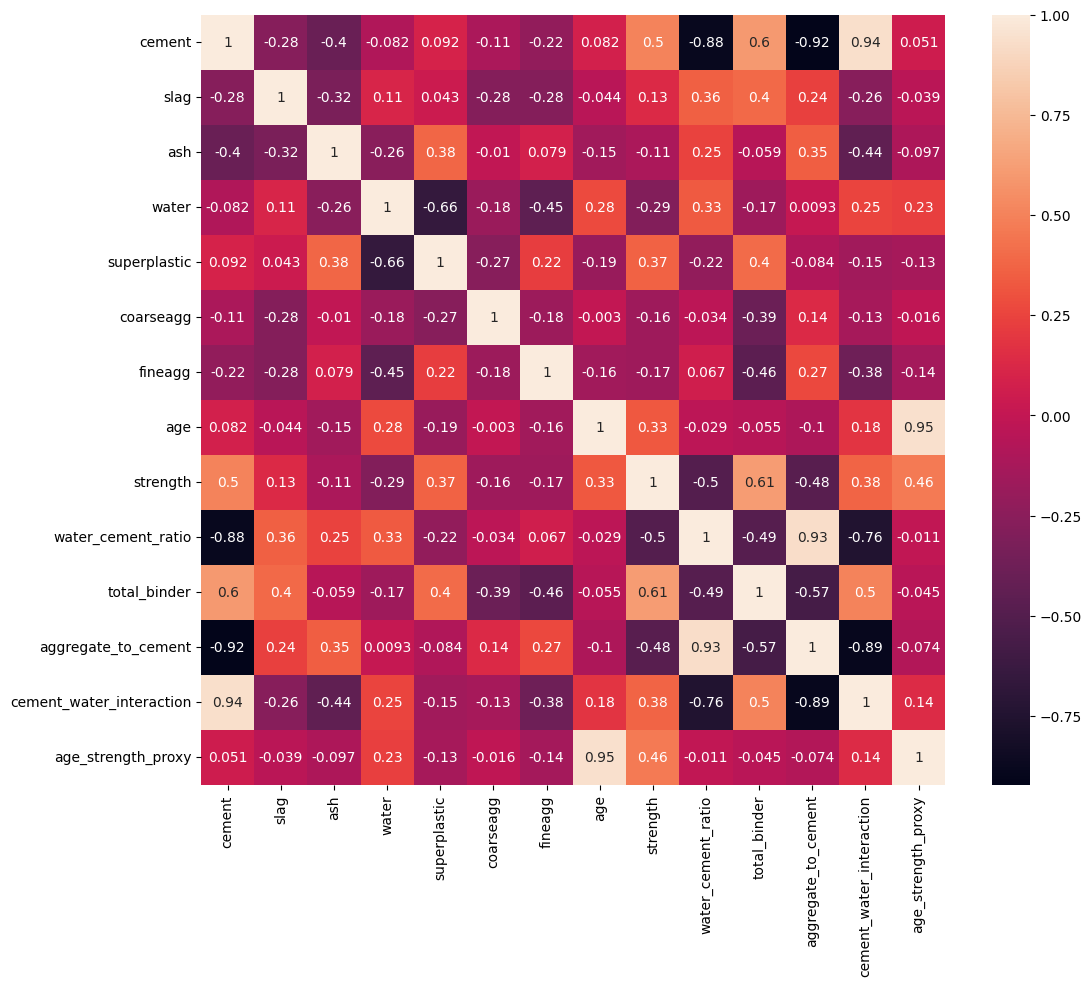

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),annot=True)

In [17]:
x = data.drop(columns='strength')
y = data['strength']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [19]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score :",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2 score : 0.9186194031444456
MAE: 2.8182397613229675
MSE: 21.86239207607419
